# Lab-Assignment

Nigel Sjölin Grech MA661E - VT2021

## Wind Power Forecasting 


## Imports

- os - operating system function, used to make platform independent paths
- Pandas - for data manipulation 
- Numpy - for array and mathematical functions 
- missingno - specific library for visualizing missing data
- plotly - for generating visualization 


In [77]:
import pandas as pd
import numpy as np
import missingno as msno
import os 
from plotly import express as px
from plotly import graph_objects as go
import seaborn as sns
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import scipy.stats as stats

pd.set_option('display.max_columns', 50)

## 1. Data Preparation

### 1.1 Reading data 

Here data is read using pandas' read_csv method. One note is that the os.path.join function is used for platform independence. The head and tail of the data is displayed and we can make an observation: that the top of the file is missing data, while the bottom not so much this may indicate inconsistent data collection at the beginning of the process. 

In [3]:
raw_turbine_path = os.path.join(os.pardir, 'data', 'Turbine_Data.csv')
raw_turbine_data = pd.read_csv(raw_turbine_path)

In [4]:
raw_turbine_data.head()

Unnamed: 0  ActivePower  AmbientTemperatue  \
0  2017-12-31 00:00:00+00:00          NaN                NaN   
1  2017-12-31 00:10:00+00:00          NaN                NaN   
2  2017-12-31 00:20:00+00:00          NaN                NaN   
3  2017-12-31 00:30:00+00:00          NaN                NaN   
4  2017-12-31 00:40:00+00:00          NaN                NaN   

   BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                      NaN               NaN               NaN   
1                      NaN               NaN               NaN   
2                      NaN               NaN               NaN   
3                      NaN               NaN               NaN   
4                      NaN               NaN               NaN   

   Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0               NaN                    NaN                        NaN   
1               NaN                    NaN                        NaN   
2               NaN                    NaN                        NaN   
3               NaN                    NaN                        NaN   
4               NaN                    NaN                        NaN   

   GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
0                    NaN           NaN                           NaN   
1                    NaN           NaN                           NaN   
2                    NaN           NaN                           NaN   
3                    NaN           NaN                           NaN   
4                    NaN           NaN                           NaN   

   GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  \
0                           NaN             NaN                 NaN   
1                           NaN             NaN                 NaN   
2                           NaN             NaN                 NaN   
3                           NaN             NaN                 NaN   
4                           NaN             NaN                 NaN   

   NacellePosition  ReactivePower  RotorRPM  TurbineStatus  WTG  \
0              NaN            NaN       NaN            NaN  G01   
1              NaN            NaN       NaN            NaN  G01   
2              NaN            NaN       NaN            NaN  G01   
3              NaN            NaN       NaN            NaN  G01   
4              NaN            NaN       NaN            NaN  G01   

   WindDirection  WindSpeed  
0            NaN        NaN  
1            NaN        NaN  
2            NaN        NaN  
3            NaN        NaN  
4            NaN        NaN

In [5]:
raw_turbine_data.tail()

Unnamed: 0  ActivePower  AmbientTemperatue  \
118219  2020-03-30 23:10:00+00:00    70.044465          27.523741   
118220  2020-03-30 23:20:00+00:00    40.833474          27.602882   
118221  2020-03-30 23:30:00+00:00    20.777790          27.560925   
118222  2020-03-30 23:40:00+00:00    62.091039          27.810472   
118223  2020-03-30 23:50:00+00:00    68.664425          27.915828   

        BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
118219                45.711129          1.515669          1.950088   
118220                45.598573          1.702809          2.136732   
118221                45.462045          1.706214          2.139664   
118222                45.343827          1.575352          2.009781   
118223                45.231610          1.499323          1.933124   

        Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
118219          1.950088                    0.0                  59.821165   
118220          2.136732                    0.0                  59.142038   
118221          2.139664                    0.0                  58.439439   
118222          2.009781                    0.0                  58.205413   
118223          1.933124                    0.0                  58.581716   

        GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
118219              55.193793   1029.870744                     59.060367   
118220              54.798545   1030.160478                     58.452003   
118221              54.380456   1030.137822                     58.034071   
118222              54.079014   1030.178178                     57.795387   
118223              54.080505   1029.834789                     57.694813   

        GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  \
118219                     58.148777       39.008931           36.476562   
118220                     57.550367       39.006759           36.328125   
118221                     57.099335       39.003815           36.131944   
118222                     56.847239       39.003815           36.007805   
118223                     56.741040       39.003815           35.914062   

        NacellePosition  ReactivePower  RotorRPM  TurbineStatus  WTG  \
118219            178.0      13.775785  9.234004            2.0  G01   
118220            178.0       8.088928  9.229370            2.0  G01   
118221            178.0       4.355978  9.236802            2.0  G01   
118222            190.0      12.018077  9.237374            2.0  G01   
118223            203.0      14.439669  9.235532            2.0  G01   

        WindDirection  WindSpeed  
118219          178.0   3.533445  
118220          178.0   3.261231  
118221          178.0   3.331839  
118222          190.0   3.284468  
118223          203.0   3.475205

#### Explaining the column names 

| Column Name                  	| Description                                                  	|
|------------------------------	|--------------------------------------------------------------	|
| Time Stamp (Unnamed 0)       	| Time stamp of the data recording, from Jan 2018 - March 2020 	|
| ActivePower                  	| The power generated by the turbine (KiloWats)                	|
| Ambient temperature          	| The ambient temperature around the turbine                   	|
| BearingShaftTemperature      	| The temperature of the turbine's bearing shaft               	|
| Blade1PitchAngle             	| The pitch angle for the turbine's blade 1                    	|
| Blade2PitchAngle             	| The pitch angle for the turbine's blade 2                    	|
| Blade3PitchAngle             	| The pitch angle for the turbine's blade 3                    	|
| ControlBoxTemperature        	| The temperature of the turbine's control box                 	|
| GearboxBearingTemperature    	| The temperature of the turbine's gearbox bearing             	|
| GearboxOilTemperature        	| The temperature of the turbine's gearbox oil                 	|
| GeneratorRPM                 	| Rotations per min for the generator                           |
| GeneratorWinding1Temperature 	| Generator Winding 1 Temperature sensor                        |
| GeneratorWinding2Temperature 	| Generator Winding 2 Temperature sensor                        |
| HubTemperature               	| Hub Temperature                                               |
| MainBoxTemperature          	| Main Box Temperature                                        	|
| NacellePosition           	| The nacelle is the casing on top of the tower that contains components necessary to move the turbine into the wind.|
| ReactivePower               	| Power that flows back from a destination toward the grid in an alternating current scenario.|
| RotorRPM                     	| Rotations per min for the Rotator|
| TurbineStatus                 | Turbine statuses, no description of their meaning|
| WTG                          	| Turbine Name                                                 	|
| WindDirection               	| Wind direction in degrees from north|
| WindSpeed                    	| Wind Speed                                                             	|

### 1.2. Manipulating Data




#### 1.2.1 Finding and handling Missing Values

In [6]:
# defining a na info display function
# we can alternatively use the df.info here but this has a prettier output

def get_info_pdf(df):
    info_df = pd.concat([df.dtypes, df.count(), df.isna().sum()], axis=1).reset_index()\
            .rename(columns={'index':'feature', 0:'dtype', 1:'# values', 2:'# na'})
    info_df['% missing'] = np.ceil((info_df['# na']*100)/len(df))
    return info_df

get_info_pdf(raw_turbine_data)

feature    dtype  # values   # na  % missing
0                     Unnamed: 0   object    118224      0        0.0
1                    ActivePower  float64     94750  23474       20.0
2              AmbientTemperatue  float64     93817  24407       21.0
3        BearingShaftTemperature  float64     62518  55706       48.0
4               Blade1PitchAngle  float64     41996  76228       65.0
5               Blade2PitchAngle  float64     41891  76333       65.0
6               Blade3PitchAngle  float64     41891  76333       65.0
7          ControlBoxTemperature  float64     62160  56064       48.0
8      GearboxBearingTemperature  float64     62540  55684       48.0
9          GearboxOilTemperature  float64     62438  55786       48.0
10                  GeneratorRPM  float64     62295  55929       48.0
11  GeneratorWinding1Temperature  float64     62427  55797       48.0
12  GeneratorWinding2Temperature  float64     62449  55775       48.0
13                HubTemperature  float64     62406  55818       48.0
14            MainBoxTemperature  float64     62507  55717       48.0
15               NacellePosition  float64     72278  45946       39.0
16                 ReactivePower  float64     94748  23476       20.0
17                      RotorRPM  float64     62127  56097       48.0
18                 TurbineStatus  float64     62908  55316       47.0
19                           WTG   object    118224      0        0.0
20                 WindDirection  float64     72278  45946       39.0
21                     WindSpeed  float64     94595  23629       20.0

##### 1.2.1.1 Visualizing Missing Data

<AxesSubplot:>

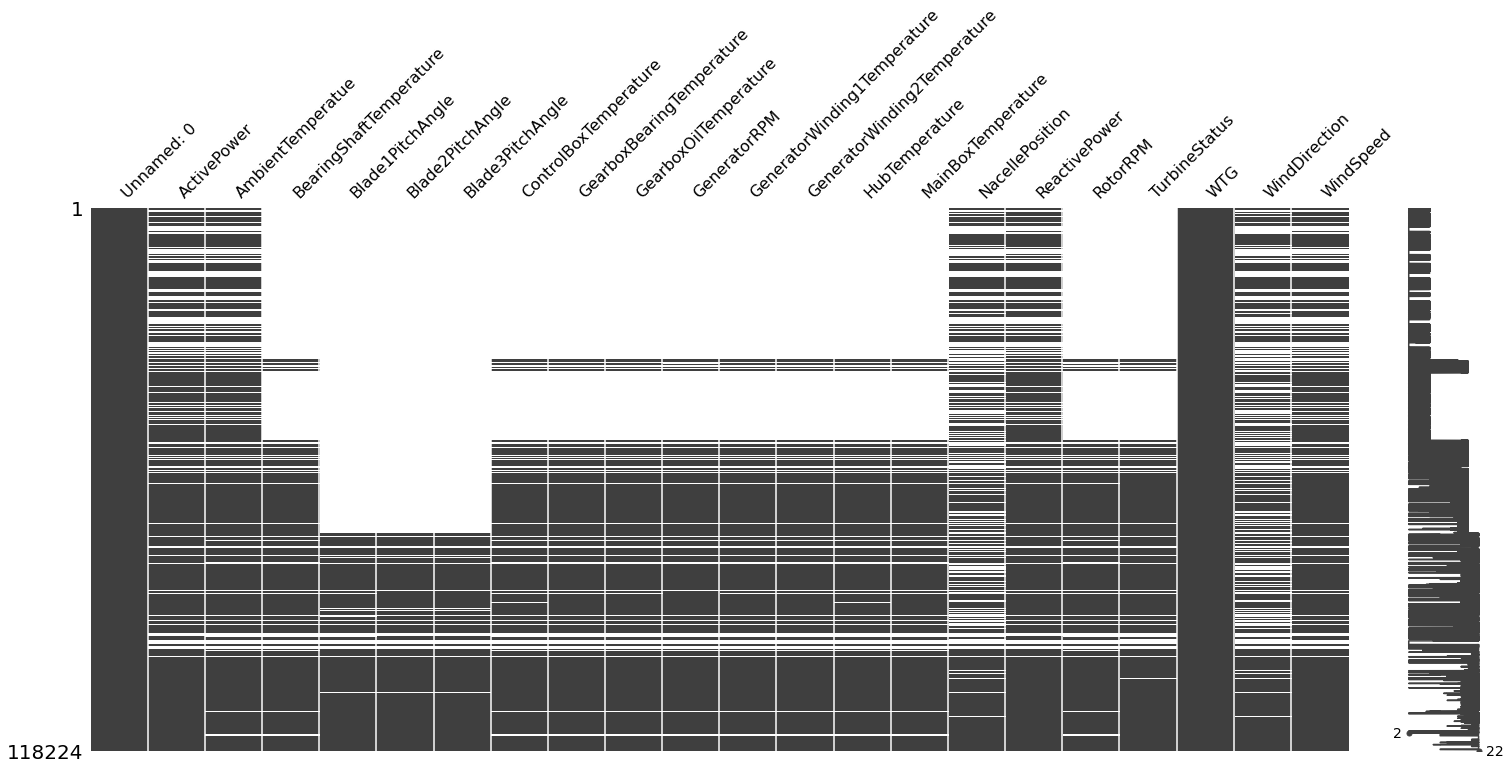

In [7]:
msno.matrix(raw_turbine_data)

##### 1.2.1.2 Fixing time series index and value range

We see there is a lot of missing data at the top of the set so we will also look at the missing data by year.

To do this we: 
- rename the time stamp col
- cast it to pandas datetime format 
- set it as the index 

In [8]:
tmp_1 = raw_turbine_data.rename(columns={'Unnamed: 0': 'TimeStamp'})
tmp_1['TimeStamp'] = pd.to_datetime(tmp_1['TimeStamp'])
missing_turbine_data = tmp_1.set_index('TimeStamp')
missing_turbine_data = missing_turbine_data.tz_localize(None)

We can also drop the 'WTG' column since it is just the wind turbine name and there is only one turbine.

In [9]:
missing_turbine_data.WTG.value_counts()

G01    118224
Name: WTG, dtype: int64

In [10]:
missing_turbine_data = missing_turbine_data.drop('WTG', axis=1)

We can now use loc to slice the data by year

<AxesSubplot:>

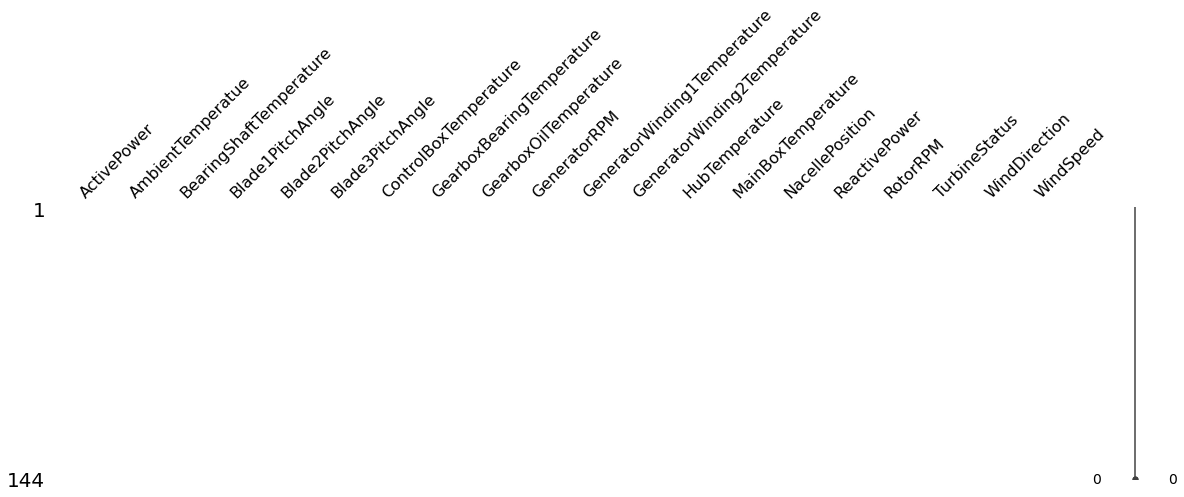

In [11]:
msno.matrix(missing_turbine_data.loc['2017'], figsize=(20, 5))

When we look at the 2017 data we see none of the columns have any values so we can safely drop all these rows.

In [12]:
before_shape = missing_turbine_data.shape
print(f'Shape before dropping 2017 rows: {before_shape}')

missing_turbine_data_v2 = missing_turbine_data.loc['2018':]

print(f'Shape after dropping 2017 rows: {missing_turbine_data_v2.shape}, we loose {before_shape[0] - missing_turbine_data_v2.shape[0]} rows')

Shape before dropping 2017 rows: (118224, 20)
Shape after dropping 2017 rows: (118080, 20), we loose 144 rows


<AxesSubplot:>

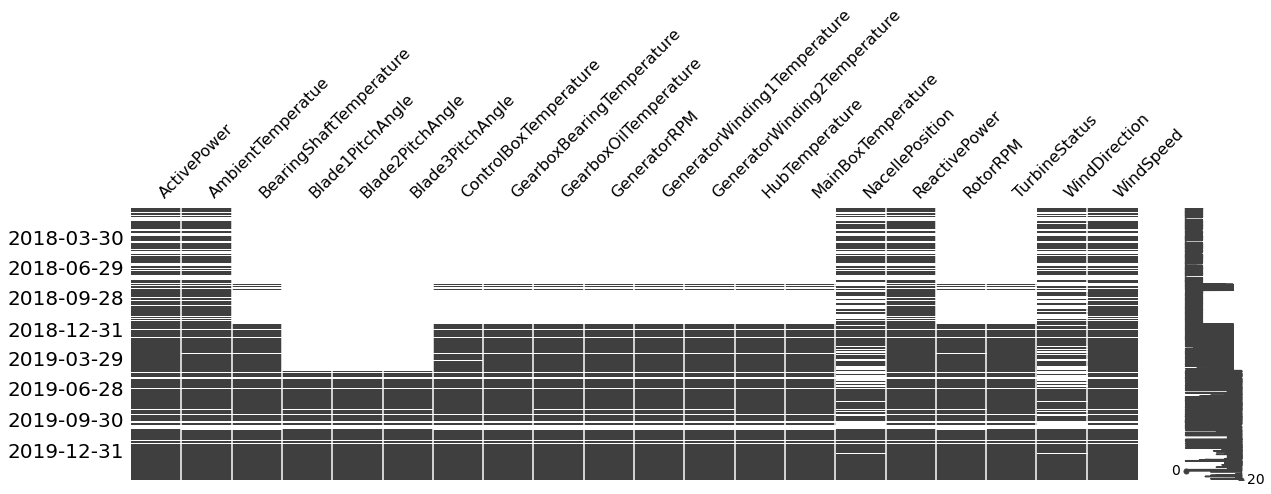

In [13]:
msno.matrix(missing_turbine_data_v2, figsize=(20, 5), freq='BQ')

In [14]:
# looking at the % of missing data again 

get_info_pdf(missing_turbine_data_v2)

feature    dtype  # values   # na  % missing
0                    ActivePower  float64     94750  23330       20.0
1              AmbientTemperatue  float64     93817  24263       21.0
2        BearingShaftTemperature  float64     62518  55562       48.0
3               Blade1PitchAngle  float64     41996  76084       65.0
4               Blade2PitchAngle  float64     41891  76189       65.0
5               Blade3PitchAngle  float64     41891  76189       65.0
6          ControlBoxTemperature  float64     62160  55920       48.0
7      GearboxBearingTemperature  float64     62540  55540       48.0
8          GearboxOilTemperature  float64     62438  55642       48.0
9                   GeneratorRPM  float64     62295  55785       48.0
10  GeneratorWinding1Temperature  float64     62427  55653       48.0
11  GeneratorWinding2Temperature  float64     62449  55631       48.0
12                HubTemperature  float64     62406  55674       48.0
13            MainBoxTemperature  float64     62507  55573       48.0
14               NacellePosition  float64     72278  45802       39.0
15                 ReactivePower  float64     94748  23332       20.0
16                      RotorRPM  float64     62127  55953       48.0
17                 TurbineStatus  float64     62908  55172       47.0
18                 WindDirection  float64     72278  45802       39.0
19                     WindSpeed  float64     94595  23485       20.0

We se the blade pitch columns are still missing in 65% of the data so we will drop these columns.

<AxesSubplot:>

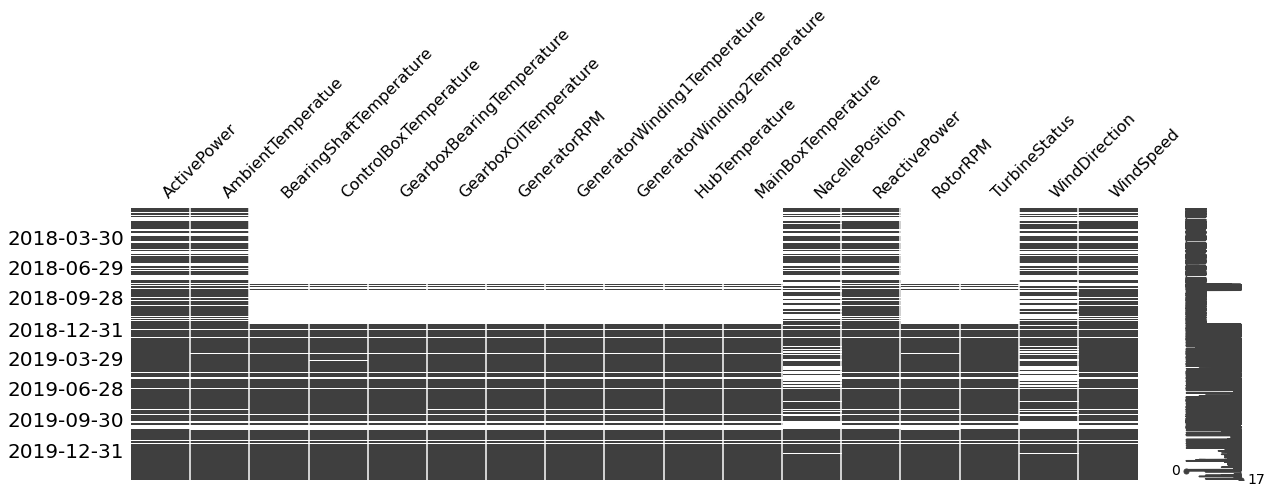

In [15]:
missing_turbine_data_v3 = missing_turbine_data_v2.drop(['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle'], axis=1)
msno.matrix(missing_turbine_data_v3, figsize=(20, 5), freq='BQ')

This now leaves us with 11 columns missing ~48% of their data and 6 columns missing 
~20%.

##### 1.2.1.3 Dropping uncorrelated columns 

We now look at the correlations in the data to remove some of the columns and reduce the amount of missing values we need to fill.

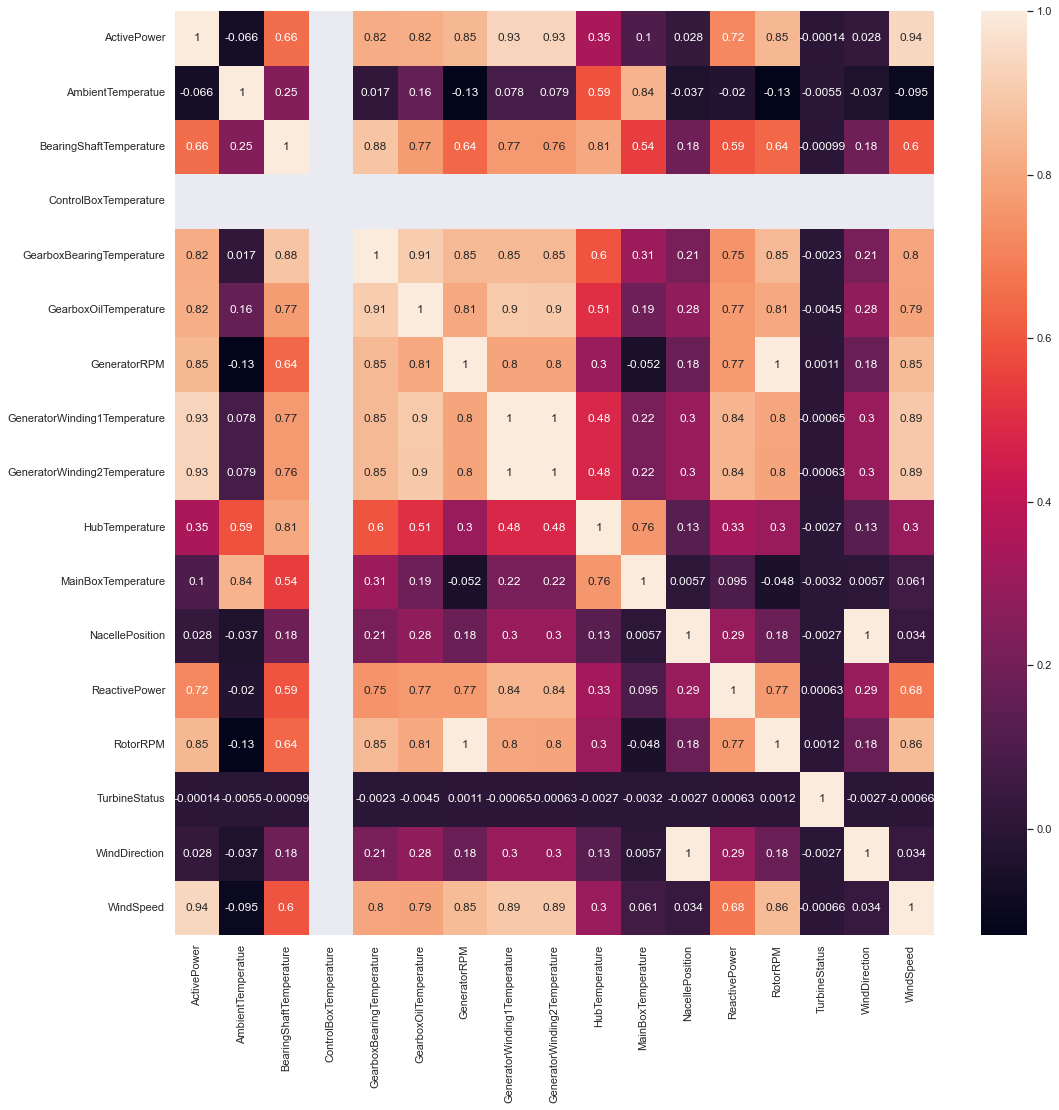

In [16]:
sns.set(rc={'figure.figsize':(17,17)})
_ = sns.heatmap(missing_turbine_data_v3.corr(), annot=True)

If we look at Active power being the target values for this data set we can start by removing those columns in the range -0.5 to 0.5:

In [17]:
cols_to_drop = [missing_turbine_data_v3.columns[i] for i, corr in enumerate(missing_turbine_data_v3.corr()['ActivePower']) if (corr < 0.5) and (corr > -0.5)] 
cols_to_drop

['AmbientTemperatue',
 'HubTemperature',
 'MainBoxTemperature',
 'NacellePosition',
 'TurbineStatus',
 'WindDirection']

We also look into the control box temperature since is has a NA correlation 

In [18]:
# Checking control box temperature values 
missing_turbine_data_v3[['ControlBoxTemperature']].value_counts()

ControlBoxTemperature
0.0                      62160
dtype: int64

We see that it has a only one value if 0.0 so we can drop the column

In [19]:
cols_to_drop.append('ControlBoxTemperature')

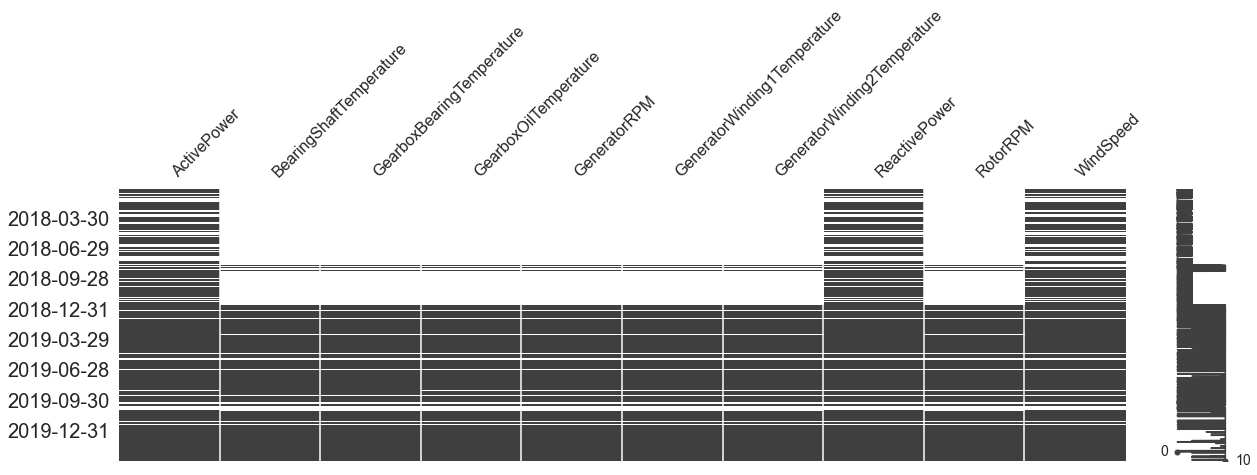

In [20]:
missing_turbine_data_v4 = missing_turbine_data_v3.drop(cols_to_drop, axis=1)
_ = msno.matrix(missing_turbine_data_v4, figsize=(20, 5), freq='BQ')

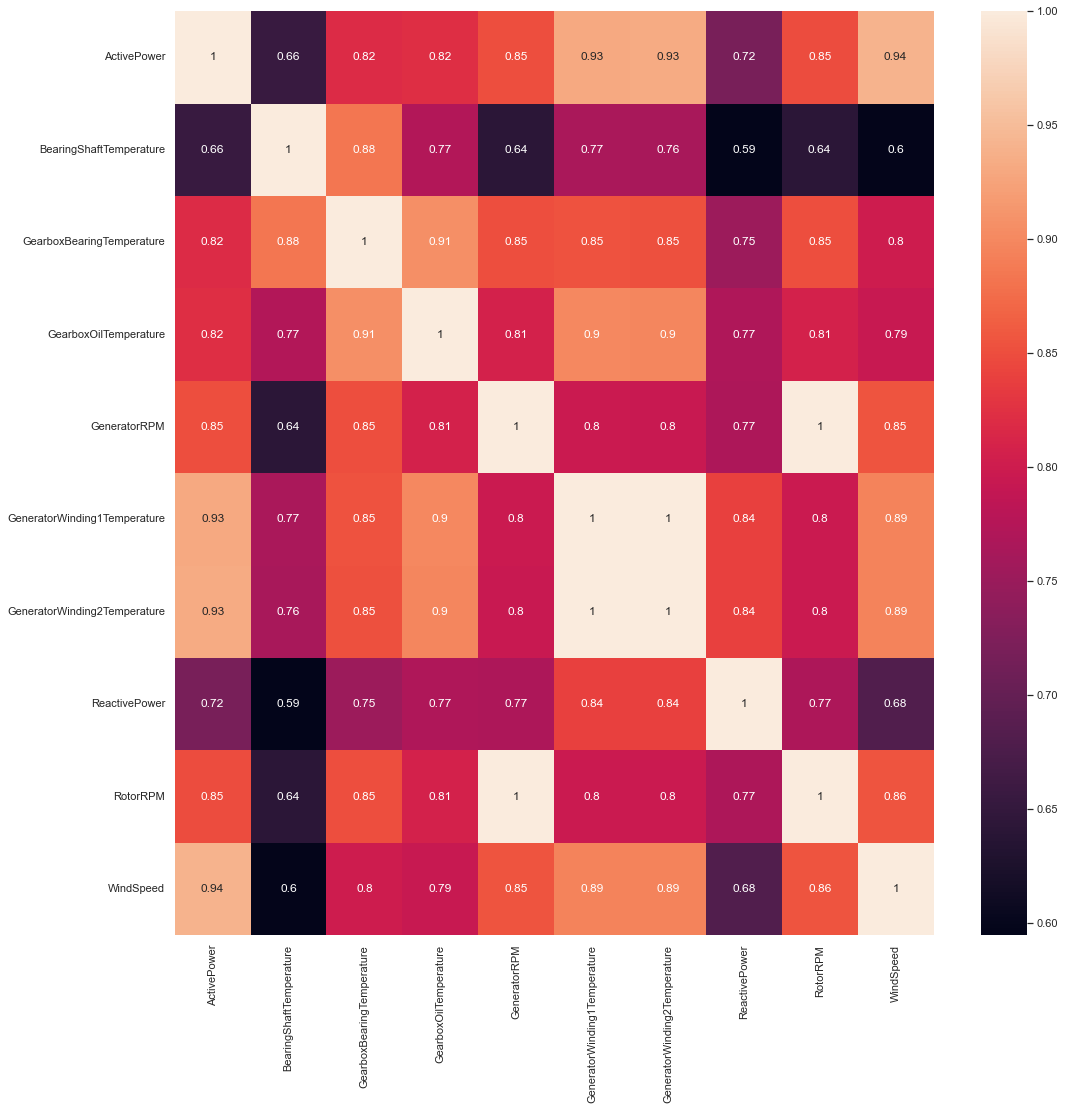

In [21]:
_ = sns.heatmap(missing_turbine_data_v4.corr(), annot=True)

Of the remaining columns we also see that some are highly correlate with each other. We will keep these columns for now.

##### 1.2.1.4 Dropping rows


To further reduce the amount of missing data we will now resample the data. Currently each row is a 10 min reading, we will see the effects of resampling to day.

In [22]:
missing_turbine_data_v5 = missing_turbine_data_v4.resample('H').mean()
get_info_pdf(missing_turbine_data_v5)

feature    dtype  # values  # na  % missing
0                   ActivePower  float64     16383  3297       17.0
1       BearingShaftTemperature  float64     10697  8983       46.0
2     GearboxBearingTemperature  float64     10699  8981       46.0
3         GearboxOilTemperature  float64     10665  9015       46.0
4                  GeneratorRPM  float64     10666  9014       46.0
5  GeneratorWinding1Temperature  float64     10665  9015       46.0
6  GeneratorWinding2Temperature  float64     10672  9008       46.0
7                 ReactivePower  float64     16370  3310       17.0
8                      RotorRPM  float64     10666  9014       46.0
9                     WindSpeed  float64     16329  3351       18.0

We now drop all days with no values

In [23]:
missing_turbine_data_v6 = missing_turbine_data_v5.dropna(how='all')
get_info_pdf(missing_turbine_data_v6)

feature    dtype  # values  # na  % missing
0                   ActivePower  float64     16383    78        1.0
1       BearingShaftTemperature  float64     10697  5764       36.0
2     GearboxBearingTemperature  float64     10699  5762       36.0
3         GearboxOilTemperature  float64     10665  5796       36.0
4                  GeneratorRPM  float64     10666  5795       36.0
5  GeneratorWinding1Temperature  float64     10665  5796       36.0
6  GeneratorWinding2Temperature  float64     10672  5789       36.0
7                 ReactivePower  float64     16370    91        1.0
8                      RotorRPM  float64     10666  5795       36.0
9                     WindSpeed  float64     16329   132        1.0

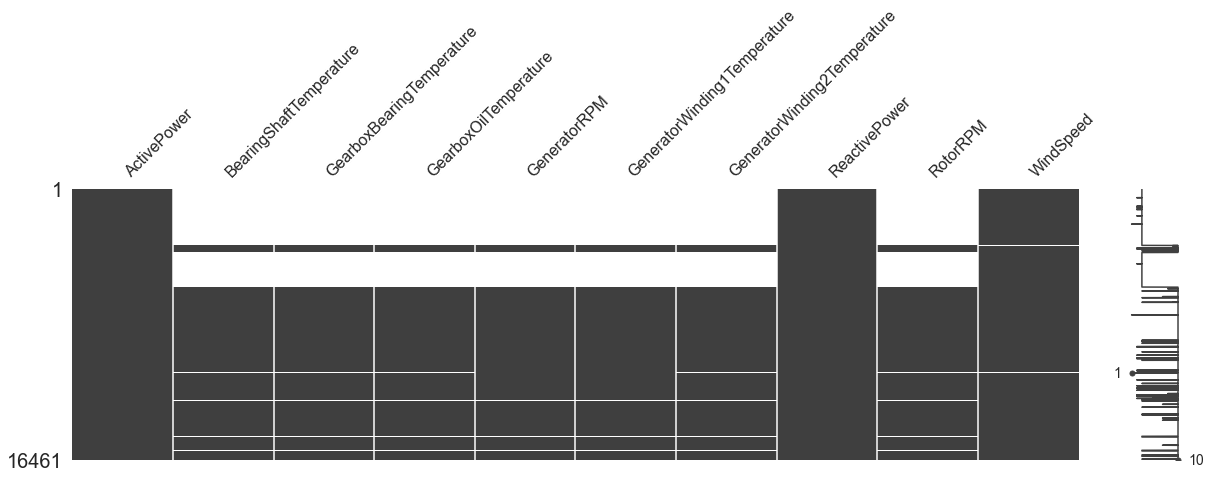

In [24]:
_ = msno.matrix(missing_turbine_data_v6, figsize=(20, 5))

In [25]:
missing_turbine_data_v7 = missing_turbine_data_v6.copy()
missing_turbine_data_v7['month'] = missing_turbine_data_v7.index.month
missing_turbine_data_v7 = missing_turbine_data_v7.fillna(missing_turbine_data_v7.groupby(missing_turbine_data_v7.month).transform('mean'))
turbine_data = missing_turbine_data_v7.drop(['month'], axis=1)
get_info_pdf(turbine_data)

feature    dtype  # values  # na  % missing
0                   ActivePower  float64     16461     0        0.0
1       BearingShaftTemperature  float64     16461     0        0.0
2     GearboxBearingTemperature  float64     16461     0        0.0
3         GearboxOilTemperature  float64     16461     0        0.0
4                  GeneratorRPM  float64     16461     0        0.0
5  GeneratorWinding1Temperature  float64     16461     0        0.0
6  GeneratorWinding2Temperature  float64     16461     0        0.0
7                 ReactivePower  float64     16461     0        0.0
8                      RotorRPM  float64     16461     0        0.0
9                     WindSpeed  float64     16461     0        0.0

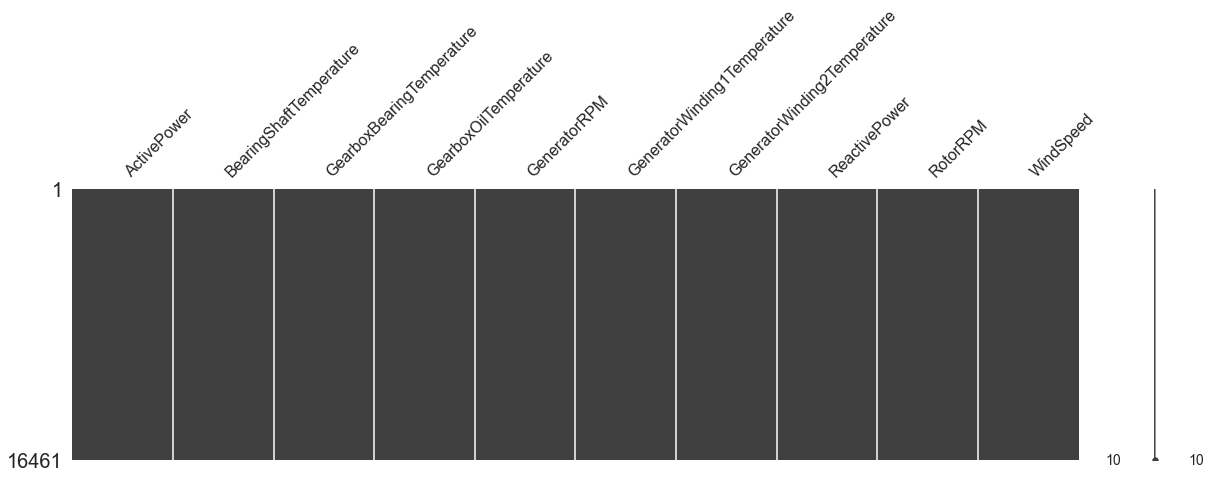

In [26]:
_ = msno.matrix(turbine_data, figsize=(20, 5))

In [27]:
n_raw_rows = raw_turbine_data.shape[0]
n_rows_with_missing_data = n_raw_rows - raw_turbine_data.dropna(how='any').shape[0]

print(f'The data originally had {n_raw_rows} rows, of which {n_rows_with_missing_data} had missing values')
print(f'To handle this the data was resamples resulting in {turbine_data.shape[0]} rows, it is important to note that this data was not lost rather that the 10-min samples were averaged into 1 hour samples')

The data originally had 118224 rows, of which 85496 had missing values
To handle this the data was resamples resulting in 16461 rows, it is important to note that this data was not lost rather that the 10-min samples were averaged into 1 hour samples


In addition the column were reduced from 21 dimensions to 10, by discarding columns with no meaning or no correlation to the target.

#### 1.2.2 Aggregating Data

We now look at making some subsets of the data to help reduce the dimensions:

- Resampling by Day 
- Resampling by Month 

The monthly resampled data will be used as a smoothed average value 

In [28]:
daily_turbine_data = turbine_data.resample('D').mean().dropna()
monthly_turbine_data = turbine_data.resample('M').mean().dropna()

## 2. Exploration of Data

### 2.1 Analyzing feasibility of values

We see that all values are within the expected ranges

In [29]:
turbine_data.describe()

ActivePower  BearingShaftTemperature  GearboxBearingTemperature  \
count  16461.000000             16461.000000               16461.000000   
mean     620.391945                42.664601                  63.628449   
std      597.937006                 4.854700                   8.965854   
min      -11.971527                 0.000000                   0.000000   
25%       94.209221                39.822072                  59.124109   
50%      413.451777                43.001554                  63.617730   
75%     1065.193044                45.988843                  69.318970   
max     1741.866150                54.844991                  82.035154   

       GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
count           16461.000000  16461.000000                  16461.000000   
mean               57.458176   1083.192516                     72.055657   
std                 5.612355    437.628822                     20.151016   
min                 0.000000      0.000000                      0.000000   
25%                53.680367    853.067739                     57.228792   
50%                56.617126   1068.692107                     66.864113   
75%                60.591454   1390.022213                     82.069771   
max                70.704681   1772.362500                    126.610136   

       GeneratorWinding2Temperature  ReactivePower      RotorRPM     WindSpeed  
count                  16461.000000   16461.000000  16461.000000  16461.000000  
mean                      71.421529      87.437680      9.714409      5.899137  
std                       20.179362     113.555182      3.927429      2.569704  
min                        0.000000     -67.262258      0.000000      0.000000  
25%                       56.598113      -0.297572      7.634175      3.875257  
50%                       66.105958      36.725996      9.583525      5.550224  
75%                       81.461678     145.955563     12.463188      7.500894  
max                      125.883743     368.532870     15.901775     21.782519

### 2.2 Univariate analysis

#### 2.2.1 Dist plots

In [30]:
def make_dist_plot(df, c):
    bin_width = (df[c].max() - df[c].min()) / 20
    fig = ff.create_distplot([df[c]], [c], bin_size=bin_width)
    fig.update_layout(title_text=f"{c} - dist plot", showlegend=False, height= 400)
    fig.show()


for c in daily_turbine_data.columns:
    make_dist_plot(daily_turbine_data, c)

#### Time series plots 

In [31]:
for c in daily_turbine_data.columns:
    fig = px.line(daily_turbine_data, y=c, x=daily_turbine_data.index)
    fig.add_traces(go.Scatter(y=monthly_turbine_data[c], x=monthly_turbine_data.index,  mode='lines',  name="Monthly mean"))
    fig.show()

#### 2.2.2 Box Plots

In [32]:
for c in daily_turbine_data.columns:
    fig = px.box(daily_turbine_data, y=c, x=daily_turbine_data.index.month, color=daily_turbine_data.index.year, labels=dict(x='Month'))
    fig.show()

As we see from the box plots of the 2018 data, the large amount of missing values that were filled skews the data towards the mean. 
As a result we see a large number of samples which are marked as outliers for 2018 but fall in the IQ range of 2019 and 2020.

Based on this we will use the data from 2019 & 2020 to remove outliers.

#### 2.2.3 Removal of outliers

In [33]:
q1 = daily_turbine_data.loc['2019':].quantile(0.25)
q3 = daily_turbine_data.loc['2019':].quantile(0.75)
iqr = q3 - q1

scrubbed_daily_td = daily_turbine_data[~((daily_turbine_data < (q1 - 1.5 * iqr)) |(daily_turbine_data > (q3 + 1.5 * iqr))).any(axis=1)]
scrubbed_daily_td.shape

(622, 10)

In [34]:
for c in daily_turbine_data.columns:
    fig = px.box(scrubbed_daily_td, y=c, x=scrubbed_daily_td.index.month, color=scrubbed_daily_td.index.year, labels=dict(x='Month'))
    fig.show()

We see that this process of outlier removal drops our daily aggregated data from 751 to 622, loosing 129 records.

### 2.3 Bivariate analysis

#### 2.3.1 Correlation heat maps

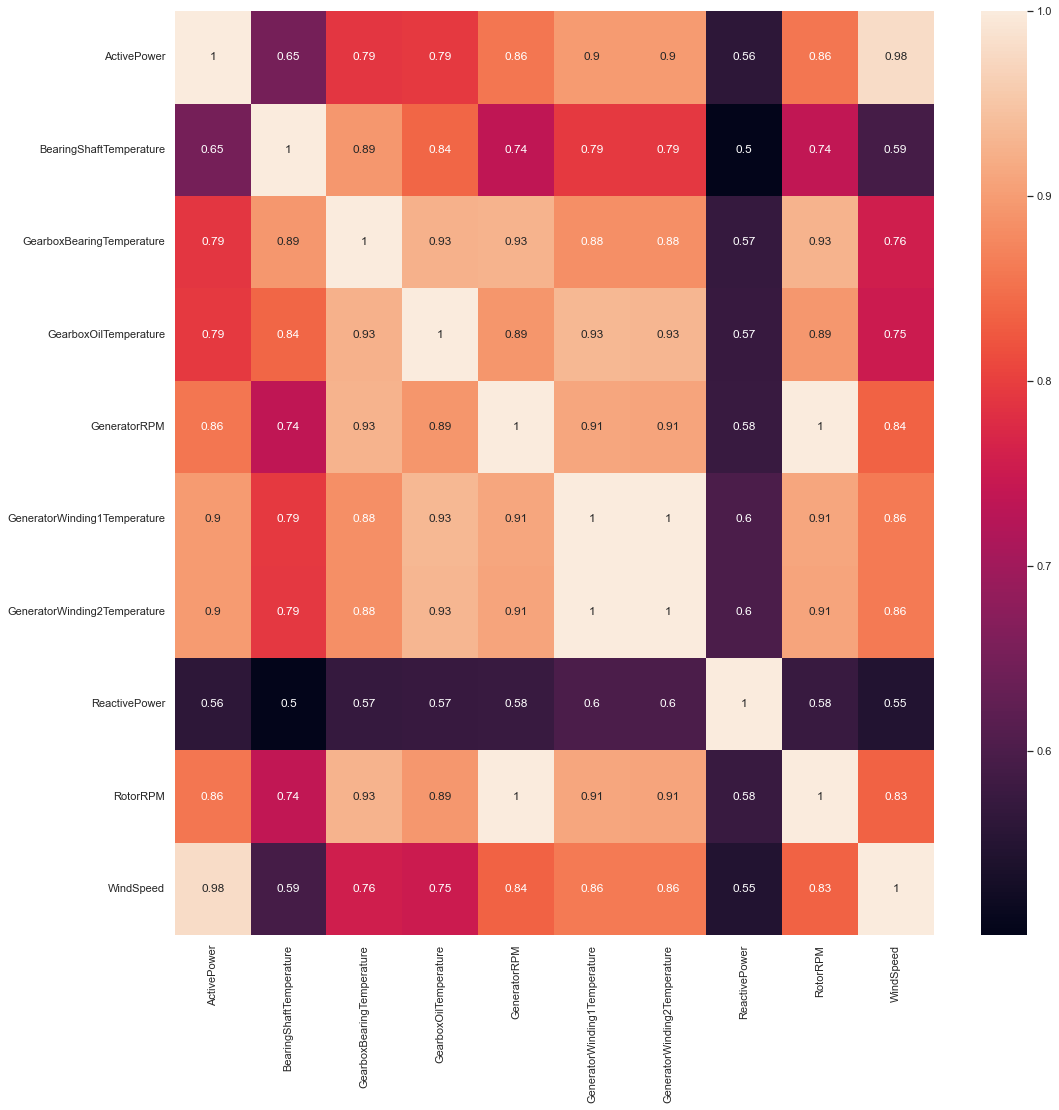

In [35]:
_ = sns.heatmap(daily_turbine_data.corr(), annot=True)

We see that the following pairs of fields are very closely related:
- GeneratorWinding1Temperature & GeneratorWinding2Temperature
- GeneratorRPM & RotorRPM
- GearboxBearingTemperature & GearboxOilTemperature

Since the pairs of fields both have the same correlation score with active power, we will keep only the first of the pair for the following plots. 

#### 2.3.2 Scatter plots 

In [53]:
selected_cols = ['BearingShaftTemperature', 'GearboxBearingTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature', 'ReactivePower', 'WindSpeed']

px.scatter_matrix(daily_turbine_data.loc[:, ['ActivePower'] + selected_cols ])

#### Joint Distribution plots

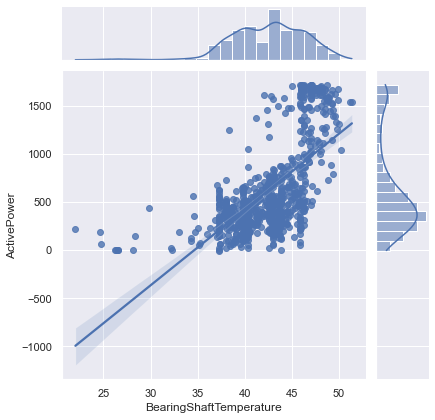

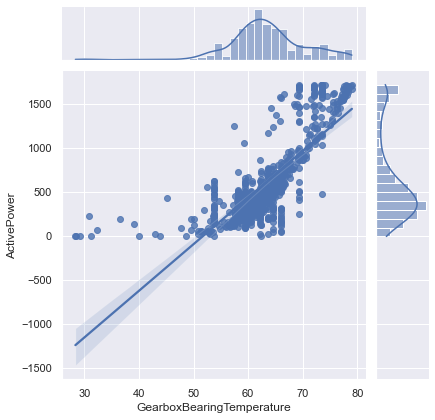

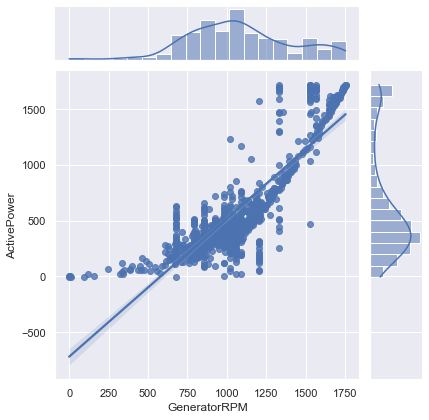

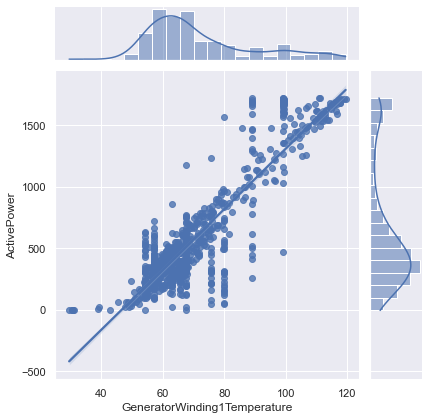

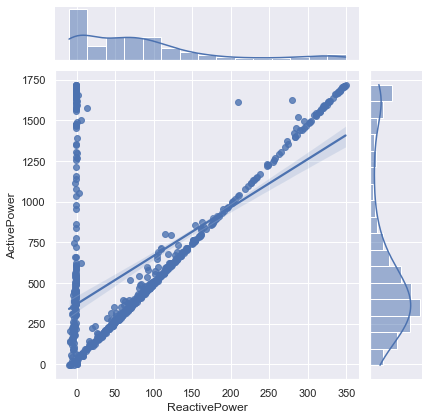

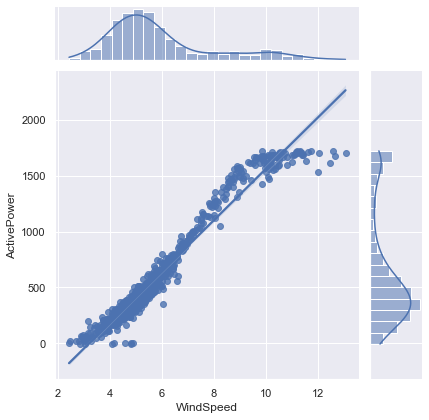

In [55]:

for c in selected_cols:
    sns.jointplot(data=daily_turbine_data, x=c, y='ActivePower', kind='reg')

#### Category plot

In [48]:
# to do cat plots we will need some category 
# for this we will bucket active power according to the quartiles 

bucketed_turbine_data = daily_turbine_data.copy()
bucketed_turbine_data['PowerCategory']  = pd.qcut(daily_turbine_data.ActivePower, 4, labels=["low", "medium-low", "medium-high", "high"])

# I also add year and month as columns since seaborn throws errors when using the dt index

bucketed_turbine_data['month'] = bucketed_turbine_data.index.month
bucketed_turbine_data['year'] = bucketed_turbine_data.index.year


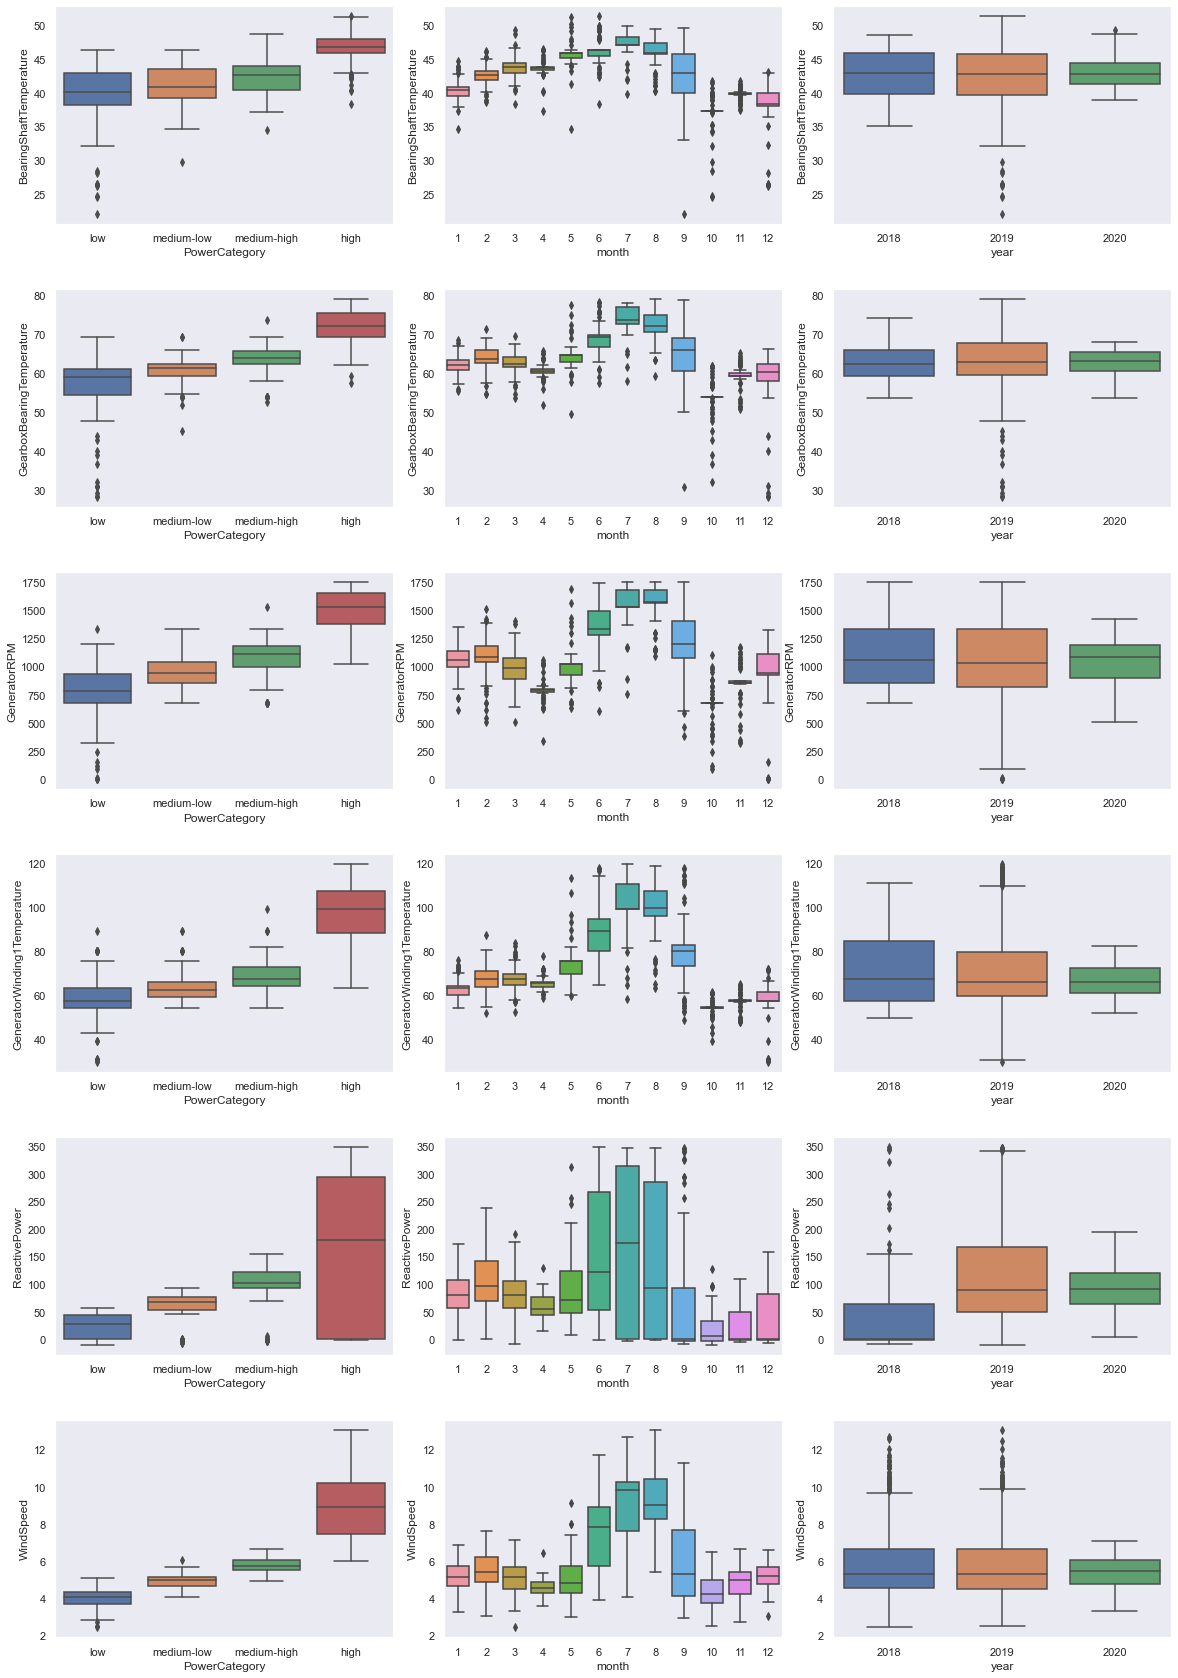

In [76]:
fig, axis = plt.subplots(6, 3, figsize=(20,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3)
i = 0
for col in selected_cols:
    sns.boxplot(data=bucketed_turbine_data, y=col,  x="PowerCategory", ax=axis[i, 0])
    sns.boxplot(data=bucketed_turbine_data, y=col,  x="month", ax=axis[i, 1])
    sns.boxplot(data=bucketed_turbine_data, y=col,  x="year", ax=axis[i, 2])
    i+=1


#### Hypothesis testing 

We will test the following hypothesis:

1. High power levels are a result of higher winds 
   1. $H_0$: There is no difference in means of wind speed between high power level and other classes 
   2. $H_a$: The mean wind speed of high power levels is *greater* than that of other power levels
2. Summer months (6,7,8) produce higher wind speeds
   1. $H_0$: There is no difference in means of wind speed between summer months and other months 
   2. $H_a$: The mean wind speed in summer months is *greater* than that of other months
3. Higher power levels produce higher component temperatures 
   1. $H_0$: There is no difference in means of temperature high power level and other classes 
   2. $H_a$: The mean of temperature of high power level is *greater* than that of lower power levels 
4. Wind speed greater than 10m/s has no effect on active power produced 
   1. $H_0$: The mean active power produced between 9-10m/s is the same as that produces by wind speeds greater than 10m/s 
   2. $H_a$: The mean power produced by wind speeds greater than 10m/s than of that produced by wind speeds between 9-10m/s

In [91]:
# Testing case 1 high power levels are a result of high windspeeds 
print(f"Mean wind speed for high power level class: {bucketed_turbine_data.loc[bucketed_turbine_data['PowerCategory']=='high', 'WindSpeed'].mean():0.2f} m/s")
print(f"Mean wind speed for lower power level class: {bucketed_turbine_data.loc[bucketed_turbine_data['PowerCategory']!='high', 'WindSpeed'].mean():0.2f} m/s")

score, p_val = stats.ttest_ind(bucketed_turbine_data.loc[bucketed_turbine_data['PowerCategory']=='high', 'WindSpeed'],
                            bucketed_turbine_data.loc[bucketed_turbine_data['PowerCategory']!='high', 'WindSpeed'],
                            equal_var=False)
if p_val<0.05:
    print(f'P-val of {p_val:0.2e} < 0.05 therefore we reject the null hypothesis.')
else:
    print(f'P-val of {p_val:0.2e} > 0.05 therefore we accept the null hypothesis.')

Mean wind speed for high power level class: 8.89 m/s
Mean wind speed for lower power level class: 4.90 m/s
P-val of 3.49e-84 < 0.05 therefore we reject the null hypothesis.


In [95]:
# Testing case 2 Summer months (6,7,8) produce higher wind speeds
summer_months = bucketed_turbine_data.loc[bucketed_turbine_data['month'].isin([6,7,8]), 'WindSpeed']
other_months = bucketed_turbine_data.loc[~(bucketed_turbine_data['month'].isin([6,7,8])), 'WindSpeed']
print(f"Mean wind speed for summer months: {summer_months.mean():0.2f} m/s")
print(f"Mean wind speed for other months: {other_months.mean():0.2f} m/s")

score, p_val = stats.ttest_ind(summer_months,
                            other_months,
                            equal_var=False)
if p_val<0.05:
    print(f'P-val of {p_val:0.2e} < 0.05 therefore we reject the null hypothesis.')
else:
    print(f'P-val of {p_val:0.2e} > 0.05 therefore we accept the null hypothesis.')

Mean wind speed for summer months: 8.68 m/s
Mean wind speed for other months: 5.12 m/s
P-val of 2.88e-52 < 0.05 therefore we reject the null hypothesis.


In [101]:
# Testing case 3 Higher power levels produce higher component temperatures

for comp_temp in ['BearingShaftTemperature', 'GearboxBearingTemperature','GeneratorWinding1Temperature']:

    
    high_pl = bucketed_turbine_data.loc[bucketed_turbine_data['PowerCategory']=='high', comp_temp]
    other_pl = bucketed_turbine_data.loc[bucketed_turbine_data['PowerCategory']!='high', comp_temp]
    print(f'\nSub-case: {comp_temp} ---:')
    print(f"Mean {comp_temp} for high power level class: {high_pl.mean():0.2f} c")
    print(f"Mean {comp_temp} for lower power level class: {other_pl.mean():0.2f} c")

    score, p_val = stats.ttest_ind(high_pl,
                                other_pl,
                                equal_var=False)
    if p_val<0.05:
        print(f'P-val of {p_val:0.2e} < 0.05 therefore we reject the null hypothesis.')
    else:
        print(f'P-val of {p_val:0.2e} > 0.05 therefore we accept the null hypothesis.')


Sub-case: BearingShaftTemperature ---:
Mean BearingShaftTemperature for high power level class: 46.60 c
Mean BearingShaftTemperature for lower power level class: 41.15 c
P-val of 4.28e-97 < 0.05 therefore we reject the null hypothesis.

Sub-case: GearboxBearingTemperature ---:
Mean GearboxBearingTemperature for high power level class: 72.00 c
Mean GearboxBearingTemperature for lower power level class: 60.55 c
P-val of 1.79e-106 < 0.05 therefore we reject the null hypothesis.

Sub-case: GeneratorWinding1Temperature ---:
Mean GeneratorWinding1Temperature for high power level class: 96.80 c
Mean GeneratorWinding1Temperature for lower power level class: 63.62 c
P-val of 1.95e-89 < 0.05 therefore we reject the null hypothesis.


In [110]:
# Wind speed greater than 10m/s has no effect on active power produced
lower_bound_filter = ((bucketed_turbine_data['WindSpeed'] >= 9) & (bucketed_turbine_data['WindSpeed'] <= 10))
lower_bound_ws = bucketed_turbine_data.loc[lower_bound_filter, 'ActivePower']
upper_bound_ws = bucketed_turbine_data.loc[bucketed_turbine_data['WindSpeed'] > 10, 'ActivePower']

print(f"Mean active power for 9-10 m/s wind speeds: {lower_bound_ws.mean():0.2f} kWs")
print(f"Mean active power for >10 m/s wind speeds: {upper_bound_ws.mean():0.2f} kWs")

score, p_val = stats.ttest_ind(lower_bound_ws,
                            upper_bound_ws,
                            equal_var=False)
if p_val<0.05:
    print(f'P-val of {p_val:0.2e} < 0.05 therefore we reject the null hypothesis.')
else:
    print(f'P-val of {p_val:0.2e} > 0.05 therefore we accept the null hypothesis.')

Mean active power for 9-10 m/s wind speeds: 1595.11 kWs
Mean active power for >10 m/s wind speeds: 1650.20 kWs
P-val of 2.72e-03 < 0.05 therefore we reject the null hypothesis.


## 3. Clustering 

### 3.1 Identifying the number of clusters